In [1]:
# sys
import os
import csv
import sys

# basic
import numpy as np
import pandas as pd

# data cleaning
sys.path.append('/home/flink/workspace/yimin/Flink-SQL-Metrics-Tracer/src/cleaners')
from seq_cleaner import *
from job_meta_data import embeddings, keys, selectivities, DAGs, DAGs_edges

# gnn and train
import tensorflow as tf
import tensorflow_gnn as tfgnn
from tensorflow_gnn.models import gat_v2, graph_sage

# demo
import matplotlib.pyplot as plt

2022-12-26 05:34:25.891322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 05:34:26.027302: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-26 05:34:26.031750: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-26 05:34:26.031766: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
train_fp = './tfgnn_dataset/nexmark_isBP_train.tfrecord'
val_fp = './tfgnn_dataset/nexmark_isBP_val.tfrecord'
test_fp = './tfgnn_dataset/nexmark_isBP_test.tfrecord'
schema_fp = './tfgnn_dataset/schema_poc.pbtxt'

In [3]:
# Read the dataset of tf.Example protos for training.
train_ds = tf.data.TFRecordDataset(filenames=[train_fp])
val_ds = tf.data.TFRecordDataset(filenames=[val_fp])
test_ds = tf.data.TFRecordDataset(filenames=[test_fp])
# Parse the GraphTensor values.
graph_schema = tfgnn.read_schema(schema_fp)
example_input_spec = tfgnn.create_graph_spec_from_schema_pb(graph_schema) # spec

2022-12-26 05:34:28.014522: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-26 05:34:28.014560: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-26 05:34:28.014589: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (camel-sane): /proc/driver/nvidia/version does not exist
2022-12-26 05:34:28.015027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# def encode_fn(serialized):
#     return tfgnn.parse_single_example(example_input_spec, serialized)

In [5]:
model_path = './tfgnn_model/exported_keras_model_12_22/'

In [6]:
# restore the model
e_whole_model = tf.saved_model.load(model_path)

In [7]:
for serilized in train_ds.batch(1).take(10):
    print(e_whole_model.signatures['serving_default'](serilized))

{'probabilities': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>, 'logits': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[45.790833]], dtype=float32)>}
{'probabilities': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>, 'logits': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[481.19128]], dtype=float32)>}
{'probabilities': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>, 'logits': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-229.60176]], dtype=float32)>}
{'probabilities': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.99999976]], dtype=float32)>, 'logits': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[15.245252]], dtype=float32)>}
{'probabilities': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>, 'logits': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1160.4429]], dtype=float32)>}
{'probabilities': <tf.Tensor: shape=

In [8]:
# serialized_sample = b'\n\x85T\n\xb6\x01\n\x14edges/src2op.#source\x12\x9d\x01\x1a\x9a\x01\n\x97\x01\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\n\x0b\x0c\r\r\x0e\x0f\x10\x11\x12\x12\x13\x14\x14\x15\x15\x16\x17\x18\x19\x1a\x1a\x1b\x1c\x1c\x1d\x1e\x1f  !""#$$%&\'\'()*+,-./01234567789:;<==>?@ABBCDDEFGHIJKLMNOPPQQRSTUVWXYZ[\\]^__`abbcdefgghijkklmnopqrstuvwxyz{||}}~\x7f\n\xf7\x01\n\x14edges/src2op.#target\x12\xde\x01\x1a\xdb\x01\n\xd8\x01\x00\x03\x04\x05\x08\t\n\r\x0f\x12\x14\x15\x17\x1a\x1d\x1e\x1f!"%&\'),-./124578:;<=>?@ABCDEHIKLOPQRSVWZ[\\]^_abefghijmpqrstuvwxyz{|}~\x81\x01\x84\x01\x85\x01\x86\x01\x87\x01\x88\x01\x89\x01\x8a\x01\x8b\x01\x8c\x01\x8d\x01\x8f\x01\x90\x01\x91\x01\x94\x01\x95\x01\x96\x01\x99\x01\x9a\x01\x9d\x01\x9e\x01\x9f\x01\xa0\x01\xa1\x01\xa2\x01\xa3\x01\xa4\x01\xa5\x01\xa7\x01\xa8\x01\xa9\x01\xaa\x01\xab\x01\xac\x01\xad\x01\xae\x01\xaf\x01\xb0\x01\xb1\x01\xb4\x01\xb5\x01\xb7\x01\xb8\x01\xba\x01\xbb\x01\xbc\x01\xbd\x01\xbe\x01\xbf\x01\xc0\x01\xc3\x01\xc6\x01\xc7\x01\xca\x01\xcb\x01\xcc\x01\xcd\x01\xce\x01\xcf\x01\xd0\x01\xd1\x01\xd2\x01\xd3\x01\xd5\x01\xd6\x01\n\x9c\x01\n\x11edges/op2op.#size\x12\x86\x01\x1a\x83\x01\n\x80\x01\x02\x00\x00\x02\x00\x00\x02\x01\x02\x01\x02\x02\x02\x01\x01\x00\x02\x00\x02\x02\x01\x02\x00\x01\x00\x01\x02\x00\x01\x00\x00\x00\x01\x00\x01\x02\x02\x00\x02\x01\x00\x00\x02\x00\x02\x00\x00\x00\x00\x00\x01\x00\x02\x00\x00\x01\x00\x02\x02\x00\x00\x01\x00\x00\x00\x00\x01\x00\x01\x00\x02\x02\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x02\x00\x00\x02\x00\x02\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x01\x00\x00\x00\x00\x01\x02\x00\x01\x02\x00\x00\x00\x00\x00\x00\x02\x02\x00\x02\x00\x00\x00\x00\x00\x00\x01\x02\x00\x00\n\xe1<\n\x1anodes/operate.hidden_state\x12\xc2<\x12\xbf<\n\xbc<\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\x00@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\x00@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\xc0@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\xc0@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@?\x1c\xb0@\xf2V\x82\xc1n\xcf\xed\xc14M\xcf\xc1\xa3\xd88\xc1c\x0e\xad\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00@@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00@@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00@AY8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x00@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x00@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00@@Y8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\x00@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\x00@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00@A\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00@A&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\x00@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\x00@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00\x80AY8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x00@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x00@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00@A^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00@A\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\xc0@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\xc0@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\x00@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\x00@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@E\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00\x00AY8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00\x00AY8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\x80@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\x80@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@DN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x8dT\xc6\xc1\xb4y!\xc1>\x02\xe3\xc1\xc4\x05\xe2\xc1\xcf\xac\x01Af\xc7\x8b\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A*\xaf\x8f\xc0\xc9\xd3\x82\xc1\xa0\x94\xf0A\xf4\xef\x82A\x1cn~Aw\x96f\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x80Aa\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x80A\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00@@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00@@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00@@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00@@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A?\x1c\xb0@\xf2V\x82\xc1n\xcf\xed\xc14M\xcf\xc1\xa3\xd88\xc1c\x0e\xad\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\xc0@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\xc0@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x00Aa\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x00A\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A?\x1c\xb0@\xf2V\x82\xc1n\xcf\xed\xc14M\xcf\xc1\xa3\xd88\xc1c\x0e\xad\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00\xc0@Y8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00@@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00@@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@*\xaf\x8f\xc0\xc9\xd3\x82\xc1\xa0\x94\xf0A\xf4\xef\x82A\x1cn~Aw\x96f\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80ADN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\xc0@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\xc0@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\xc0@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\xc0@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@E\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@DN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A*\xaf\x8f\xc0\xc9\xd3\x82\xc1\xa0\x94\xf0A\xf4\xef\x82A\x1cn~Aw\x96f\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@E\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x00Aa\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x00A\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\x00@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\x00@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80ADN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80AE\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00AE\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00AE\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@*\xaf\x8f\xc0\xc9\xd3\x82\xc1\xa0\x94\xf0A\xf4\xef\x82A\x1cn~Aw\x96f\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@E\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\x80@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\x80@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00@@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00@@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@DN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x80@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x80@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@DN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00@@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00@@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@E\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@]\xd3{A\x8b\xedE\xc1\xa1\xacs@4kcA\xb0\xbf\xfcA(\x07o\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\xc0@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\xc0@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@DN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x80@a\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x80@\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@A\x1d8o\xc1\r\xb5\xb7\xc0\x87FX\xc17o\xf0\xc1js\xfd\xc05\xdf9\xc1\xaem\xf5?\xb0\xe50?\x00\x00\x00AY8\xe1A\xe6\x9f\x14\xc1\xde\xf1L\xc0\xe5\x18\xe6A*M\xcaAt\x19a\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\x00A^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\x00A\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@*\xaf\x8f\xc0\xc9\xd3\x82\xc1\xa0\x94\xf0A\xf4\xef\x82A\x1cn~Aw\x96f\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@?\x1c\xb0@\xf2V\x82\xc1n\xcf\xed\xc14M\xcf\xc1\xa3\xd88\xc1c\x0e\xad\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@\xder\x91?zh\x0b\xc1\rfu\xc1\x85\xf0\xe8\xc1 W8\xc1[{!\xc1e\xe3,?\xe2\xf50?\x00\x00\xc0@\xea\xce\x97@\xc5\xb8hA\xe8B\xfb\xc1\xacO/\xc1\xd7\xda\x8eA\x06*\x1a\xc1\x9e\xb3w>\x19\'\x9c>\x00\x00\xc0@&\x08\xafA3\xbc\xb2\xc0\xc6\xf6\x14A\x9c5\xccA\xdey\xceA\xd1\xab\x80\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0@\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x00Aa\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x00A\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\x8dT\xc6\xc1\xb4y!\xc1>\x02\xe3\xc1\xc4\x05\xe2\xc1\xcf\xac\x01Af\xc7\x8b\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\x9b\xca\x80\xc0\x1217\xc0\x18\x97\xbc\xc1g\xea-\xc1\x19\xd9\xa8\xc1\xfb\xbc(\xc1]\xc2\x0f?\xb3\xa5\xd5>\x00\x00\x00Aa\xd8+A\xa1\xcf\xdeA\xe1\xa8F\xc2\xe8-Z\xc1\x10>\xa1A\x01\xb8\x8e\xc0\x03\xedb=\xff\xc0\x939\x00\x00\x00A\x9f\x91.\xc0G5\xfe\xc0\xa0\x08\nBR\xe5\xefA\x92q|@\x82m\x1c\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A?\x1c\xb0@\xf2V\x82\xc1n\xcf\xed\xc14M\xcf\xc1\xa3\xd88\xc1c\x0e\xad\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00A\n\xb8\x95\xc0.\xc9\x93\xc0\x1d\xa4\x10A\x86\xb8p\xc0\xfc\xbe\xd1\xc1z\x01g\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80A\x8dT\xc6\xc1\xb4y!\xc1>\x02\xe3\xc1\xc4\x05\xe2\xc1\xcf\xac\x01Af\xc7\x8b\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00AE\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@*\xaf\x8f\xc0\xc9\xd3\x82\xc1\xa0\x94\xf0A\xf4\xef\x82A\x1cn~Aw\x96f\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80AE\xde}@\xe8\x19\xcd\xc0[\x06sA\xf5>\xa4@V\xb3\x9aA\x9a\xaf\x99\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xc7*\xa3A\xe7zrA\x15$\xd0\xc1\xef\xcf+\xc1O\xe6\x82A\x90\xb7\x03\xc1\xaeh\xa98\xbf\xe4\xc05\x00\x00\x80?c\xae\xb1\xc0\x18\xa4p\xc0\x1d`\xac\xc1\xc8D%\xc1v`\x8f\xc1\x87r6\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@=~\x0e?!\xb1\xea\xc0R\xe2\xfc\xc1#\xa5`\xc1p\x80\x89\xc1\xfe\x9aW\xc1\x7f\xc2E?$\xb5@?\x00\x00\x00@^\xc4\x1b\xc2\x13\xf5\xb4>:`\xa7\xc1\x04\xf5\xb7\xc1\xc1\xc9]\xc0\xf9Hf\xc1\x87\x10\x14>(P\x0f>\x00\x00\x00@\xff\xad\x1e\xc1\xcas\x80@\xc2\xc8\xd5\xc0\x19\xd1r\xc0\xe7\x1f\xbf\xc1\x165_\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@?\x1c\xb0@\xf2V\x82\xc1n\xcf\xed\xc14M\xcf\xc1\xa3\xd88\xc1c\x0e\xad\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@@DN;A\xed"\xdc\xc0\x8b[O\xc1\xa0T\xd8\xc0\x9c@\xbbA\x86k\x98\xc1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80@\n\x8f\x01\n\x13edges/op2op.#source\x12x\x1av\nt\x00\x01\x05\x06\n\x0b\r\x0f\x10\x12\x14\x15\x17\x18\x1a\x1b\x1d\x1f"#&\')*,./2578;@CEFHILMOSTWX_bcgjkmnrx{~\x7f\x81\x01\x82\x01\x8c\x01\x8d\x01\x8f\x01\x91\x01\x92\x01\x96\x01\x97\x01\x9a\x01\x9b\x01\xa4\x01\xa5\x01\xa9\x01\xaf\x01\xb1\x01\xb2\x01\xb5\x01\xb7\x01\xb8\x01\xc0\x01\xc1\x01\xc3\x01\xc4\x01\xc7\x01\xc8\x01\xd0\x01\xd2\x01\xd3\x01\n\x9d\x01\n\x12nodes/source.#size\x12\x86\x01\x1a\x83\x01\n\x80\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\n\x9f\x08\n\x14context/hidden_state\x12\x86\x08\x12\x83\x08\n\x80\x08\xef\xeeFI\xb3$\x99F\x11\x11\xdaI\x89]\x84Fa\x85\x9dL\xdf\xb9\xb7H]\xb9\xcaJ\x81\xa9EHv\x8f\xa8L\xc5\x1b\xc1H\xbc\xbb\xdeJ\x8a\xa6WH\x05\x0b\x18K ?\x94H\x1f#\x15L\x840\x1fH\xb0C\x94I\x80\xc2\x0fG\xe6k\xbaK\xa5\xfc\xc6GUU\x15G\x11\xf1\x80D\x89\x88\x17J\xeb\xb8eG#-3J\'W\x8bG\xde\xdd\x12J\x89\xd9\xe9F\xde\x8f\xf8Ln\xa8\x04I:9\xfaI\x006\x0fF]\xb9\xcaJ\x81\xa9EHH\xbf\xe0K.\xbd\x00H\xbc\xbb\xe9I\xa6\x86;G]\xb9\xcaJ\x81\xa9EH\xad\x9d\xaeL\x884\x8bI<\xb8\xf2G"\x06HE33\xf3G\x9a1%E\xe6k:M\xa5\xfcFIv\x8f\xa8L\xc5\x1b\xc1H\xe6k:M\xa5\xfcFI\xbe\x90\xe4I\xc9\x84;G\xcd\xcc\x02Kk\x86\xcfG\xc9A\xbaJM|\x94G1\xd7\xfcL\xd3\xd4\x10I\xa4\x15*K\xf3!\xcdGVz\xb9K\xd3\xb33I\xad\x9d.M\x884\x0bJ\xab[\xa8Mqa\xc4I\xc9A\xbaJM|\x94G>&\x07LV\xc6\x83I\xde\xdd=Gf\x06\x96DH\xbf`M.\xbd\x80I]\xb9\xcaJ\x81\xa9EH\xd26\x9bL\xd5ywI1G\xcaJl\x0fEHH\xbf\xe0K.\xbd\x00Ho\x00\x9eH\xcd\x11\x02F3s\x8eJ\xe6"\xa6F\x00\x00\x8aI\t\xcb\x07G"J\x92L\x82x\xaaH\x07c\xd9K\xd7x\x83H1G\xcaJl\x0fEH\x9a\xd9\x1aKf\r3Gw\xb7\xf6J&\xc3\x0fG\xed\xd0\x0bM|=\x15Iv\x8f\xa8M\xc5\x1b\xc1I\xc8\x92IK\x0c\xc2\x9cH\xab[\xa8Mqa\xc4I"\xa2\x08J\x80\xa5\xd7F<\xd2hL`\x9b9IH\xbf`L.\xbd\x80H\xdaa\x06K\xbb\x02QH\xdaa\x86K\xbb\x02\xd1H,\x07\xd2K\xd4\xf7\xf4G\x9a\x992J\x9a\xa4\xd7F<\xd2hL`\x9b9I\xa5b5H\x11-XE\x07cYL\xd7x\x03Iv\x8f(L\xc5\x1bAHcJ6L\xfb;\x10I"b\xeaJ\xb5\xdc\xbaG\x00 FK\xf3\xfcfG\xd26\x9bK\xd5ywH\x00\x00\x00\x00wG\xa5D&\x90\x8fI\x1e\xa7\x0cG\xab\xaabH\x9a\xe3\xb0EH\xbf\xe0L.\xbd\x00I\xd9\r\xf3L\xf9O\xc0I33\x13I\xab\x1dHF33\x93G\xde\xc5\xdbD\xa2\xcb\xabFU\xc5"D\x89\xa0ILY\x13kHa\x85\x9dL\xdf\xb9\xb7H\xbc\xbbcH\xcd\xa4\xa1E""\x92G"2\x01E\xd26\x1bL\xd5y\xf7H\xc8\x92IK\x0c\xc2\x9cHH\xbf\xe0K.\xbd\x00H33\xebHw\x0b\xbaEDD\x14J\xc9\xc3\x8fG\x9a/,J\xd5\x8d\x08G\xef\xeeZIw\xa1\xa9F\x9a\x99\x99E\xde]BCE\n\xa3KC5EHv\x8f\xa8M\xc5\x1b\xc1I\xe1\xa5\xadJ\r\xf3QG7\xd1\xf6J\x95\xc3\x0fGv\x8f(L\xc5\x1bAH\x10\xa3\x90J\x91\xab/G\xfa\xc0dI\xb3\x85\xbbFv\x8f\xa8L\xc5\x1b\xc1H\x07cYL\xd7x\x03I\xb7WxK\x11\xfbEH\x07cYL\xd7x\x03If&\xeeJW\xc4\x8fG\x11\x11\xd2IU<\xacF>7\xeeJ`\xc3\x8fG\xd26\x9bK\xd5ywHDD\x94I"\xc6\x0fG\xcdl@K\xbcp[Gff3J\xbc`AF\xde\xdd\x9dH\xde\x13\x14F\x00\x00\x98H\xbc\xeb\xaeD\xab\xba\xfaKnx\x0fHv\x8f\xa8L\xc5\x1b\xc1H:z`L\xa1\xeb\x82H \xda\x86K\x9e_\x03I\xd3\xb3rJ+\xf6\x8aF\xdaa\x86K\xbb\x02\xd1H\xff\xa6\xb0H363Fw\xd72K\\\x9e\xadH]\xb9\xcaK\x81\xa9EI \xda\x86K\x9e_\x03IH\xbf\xe0L.\xbd\x00I33oI\xab\xc0\xeaF\xab\xaa*G\x00\xc0[D\xab[\xa8Mqa\xc4Iww\xd7G\xcdl\tE""*J\xeb\x8c\x07G\x80\xfc\xf6GD\x04HE\xcd\xcc\x0eIU\x06\x8bF|=\xb6I\xe6\xc3\x8fF\n\x9d\x01\n\x12edges/src2op.#size\x12\x86\x01\x1a\x83\x01\n\x80\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x02\x01\x01\x01\x01\x02\x01\x02\x02\x01\x01\x01\x01\x02\x01\x02\x01\x01\x01\x02\x01\x02\x01\x02\x01\x01\x02\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x01\x02\x01\x02\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x02\x01\x01\x01\x01\x02\x01\x01\x01\x02\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x01\x01\n\x9e\x01\n\x13nodes/operate.#size\x12\x86\x01\x1a\x83\x01\n\x80\x01\x03\x01\x01\x03\x01\x01\x03\x02\x03\x02\x03\x03\x03\x02\x02\x01\x03\x01\x03\x03\x02\x03\x01\x02\x01\x02\x03\x01\x02\x01\x01\x01\x02\x01\x02\x03\x03\x01\x03\x02\x01\x01\x03\x01\x03\x01\x01\x01\x01\x01\x02\x01\x03\x01\x01\x02\x01\x03\x03\x01\x01\x02\x01\x01\x01\x01\x02\x01\x02\x01\x03\x03\x01\x01\x01\x01\x01\x01\x01\x01\x03\x02\x03\x01\x01\x03\x01\x03\x01\x01\x01\x01\x01\x01\x01\x03\x01\x01\x02\x01\x01\x01\x01\x02\x03\x01\x02\x03\x01\x01\x01\x01\x01\x01\x03\x03\x01\x03\x01\x01\x01\x01\x01\x01\x02\x03\x01\x01\n\xa4\x04\n\x19nodes/source.hidden_state\x12\x86\x04\x12\x83\x04\n\x80\x04\x00\x00\x00@\x00\x00\xc0@\x00\x00@A\x00\x00\xc0@\x00\x00\x80@\x00\x00@A\x00\x00@@\x00\x00@A\x00\x00\x00@\x00\x00@@\x00\x00\x00@\x00\x00@A\x00\x00\x00@\x00\x00\x00@\x00\x00\x80A\x00\x00\x00@\x00\x00\x00@\x00\x00\x00@\x00\x00@A\x00\x00\xc0@\x00\x00\xc0@\x00\x00\x00@\x00\x00\xc0@\x00\x00\x00A\x00\x00\x80@\x00\x00\x00A\x00\x00\x80@\x00\x00@A\x00\x00@@\x00\x00\xc0@\x00\x00@A\x00\x00\x80A\x00\x00@A\x00\x00\x80A\x00\x00@A\x00\x00\x80A\x00\x00@@\x00\x00\x80A\x00\x00@@\x00\x00\x80A\x00\x00\x00@\x00\x00\x00@\x00\x00\xc0@\x00\x00@@\x00\x00\x00A\x00\x00\x80A\x00\x00\x00A\x00\x00\xc0@\x00\x00\x80A\x00\x00\x00@\x00\x00\xc0@\x00\x00\x80A\x00\x00@@\x00\x00\x80A\x00\x00\xc0@\x00\x00@A\x00\x00\x00A\x00\x00\xc0@\x00\x00\xc0@\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\x80A\x00\x00\x00A\x00\x00\x00@\x00\x00\xc0@\x00\x00\x00A\x00\x00\x80@\x00\x00\x80@\x00\x00@A\x00\x00\x00A\x00\x00\x00@\x00\x00\x80A\x00\x00\x80A\x00\x00\x00A\x00\x00\x00A\x00\x00\xc0@\x00\x00\x00A\x00\x00\xc0@\x00\x00@A\x00\x00\x80@\x00\x00\x00A\x00\x00@@\x00\x00\x00@\x00\x00\x00@\x00\x00\x80@\x00\x00\xc0@\x00\x00@@\x00\x00@@\x00\x00\x00@\x00\x00\x80A\x00\x00\xc0@\x00\x00\x00A\x00\x00@@\x00\x00@A\x00\x00\xc0@\x00\x00@A\x00\x00\x80A\x00\x00\x00A\x00\x00\x80A\x00\x00\x80@\x00\x00\x80A\x00\x00\x00A\x00\x00\x80@\x00\x00\x80@\x00\x00@A\x00\x00\x00A\x00\x00\x00A\x00\x00\x00@\x00\x00\x00A\x00\x00\xc0@\x00\x00\x80@\x00\x00\x80A\x00\x00@@\x00\x00\xc0@\x00\x00\x00A\x00\x00\x00A\x00\x00\x00A\x00\x00\x00A\x00\x00\x80A\x00\x00\x00A\x00\x00\x00@\x00\x00\x80A\x00\x00\x00@\x00\x00@@\x00\x00\x00@\x00\x00@@\x00\x00\x80@\n\x90\x01\n\x13edges/op2op.#target\x12y\x1aw\nu\x01\x02\x06\x07\x0b\x0c\x0e\x10\x11\x13\x16\x16\x18\x19\x1b\x1c\x1e #$((*+-003699<ADFGJJMNPTUXY`cdhklnosy|\x7f\x80\x01\x82\x01\x83\x01\x8e\x01\x8e\x01\x90\x01\x92\x01\x93\x01\x97\x01\x98\x01\x9b\x01\x9c\x01\xa6\x01\xa6\x01\xaa\x01\xb0\x01\xb2\x01\xb3\x01\xb6\x01\xb9\x01\xb9\x01\xc1\x01\xc2\x01\xc4\x01\xc5\x01\xc8\x01\xc9\x01\xd1\x01\xd4\x01\xd4\x01'

In [9]:
def gtensor2serial(gtensor):
    return tfgnn.write_example(gtensor).SerializeToString()

In [10]:
def make_graph_tensor(**kwargs):
    # function for job-level 
    
    nodes = kwargs['nodes']     # {source: [parallelisms], 
                                #  operate: [parallelisms, 
#                                            bytes_selectivities,
#                                            records_selectivities,
#                                            utilization_embeddings]}
    edges = kwargs['edges']     # {[[sources,],[targets,]]}, {src2op, op2op}
    context = kwargs['context'] # [3], [bytes_inpute_rate, records_input_rate, label_isBP,]
    
    graph = tfgnn.GraphTensor.from_pieces(
        # make node_sets
        node_sets={
            'source': tfgnn.NodeSet.from_fields(
                sizes=tf.constant([len(nodes['source'])]),
                features={
                    'parallelism': tf.constant(nodes['source'])
                }),
            'operate': tfgnn.NodeSet.from_fields(
                sizes=tf.constant([len(nodes['operate'][0])]),
                features={
                    'parallelism': tf.constant(nodes['operate'][0]),
                    'bytes_selectivity': tf.constant(nodes['operate'][1]),
                    'records_selectivity': tf.constant(nodes['operate'][2]),
                    'utilization_embedding': tf.constant(nodes['operate'][3]),
                }),
        },
        # make edge_sets
        edge_sets={
            'src2op': tfgnn.EdgeSet.from_fields(
                sizes=tf.constant([len(edges['src2op'][0])]),
                adjacency=tfgnn.Adjacency.from_indices(
                    source=('source', tf.constant(edges['src2op'][0])),
                    target=('operate', tf.constant(edges['src2op'][1])))),
            'op2op': tfgnn.EdgeSet.from_fields(
                sizes=tf.constant([len(edges['op2op'][0])]),
                adjacency=tfgnn.Adjacency.from_indices(
                    source=('operate', tf.constant(edges['op2op'][0], dtype=tf.int64)),
                    target=('operate', tf.constant(edges['op2op'][1], dtype=tf.int64)))),
                
        },
        # make context
        context=tfgnn.Context.from_fields(
                features={
                    'bytes_input_rate': tf.constant([context[0],]),
                    'records_input_rate': tf.constant([context[1],]),
                    'label_isBP': tf.constant([context[2]]),
                })
    )

    return graph

In [11]:
class graph_tensor_dataset_maker:
    def __init__(self, embeddings, keys, DAG, selectivities, o_fp='./tfgnn_test/dummy/try_write.tfrecord', debug=False):
        self.embeddings = embeddings
        self.keys = list(keys) # ndarray -> list
        self.DAG = DAG
        self.selectivities = selectivities
        self.o_fp = o_fp
        self.debug = debug
        self.dataset_buffer = []
    
    def buffer_output(self, demo=False):
        with tf.io.TFRecordWriter(self.o_fp) as writer:
            for graph in self.dataset_buffer:
                example = tfgnn.write_example(graph)
                if demo:
                    print(example)
                writer.write(example.SerializeToString())

    def make(self, row):
        # encode sample row data
        qid = row['qid']
        inBrate = row['pseudoInputBytesRate']
        inRrate = row['pseudoInputRecordsRate']
        parallels = eval(row['vPs'])
        parallels = [float(e) for e in parallels]
        label = row['isBP']
        vnum = len(parallels)
        
        # find coress-information        
        dag = self.DAG[qid]
        embeds = [] # length should be vnum-1, since no embedding for the source vertex
        for i in range(1, vnum):
            vkeyname = ''.join(['q', str(qid), 'v', str(i)])
            embeds.append(self.embeddings[self.keys.index(vkeyname)])
        
        # make context
        context = [row['pseudoInputBytesRate'],
                   row['pseudoInputRecordsRate'],
                   1 if row['isBP'] else 0]
        
        # make edges
        src2op_edges = []
        op2op_edges = []
        for i in range(len(dag[0])):
            s = dag[0][i]
            t = dag[1][i]
            if s == 0:
                src2op_edges.append([s,t])
            else:
                op2op_edges.append([s,t])
        edges = {
            'src2op': [[e[0] for e in src2op_edges],
                       [e[1]-1 for e in src2op_edges]],
            'op2op': [[e[0]-1 for e in op2op_edges],
                      [e[1]-1 for e in op2op_edges]],
        }
        
        # make nodes
        nodes = {}
        nodes['source'] = [parallels[0]]
        vselects = []
        for i in range(1, vnum):
            vselects.append([
                self.selectivities['true_selectivity_bytes'][(qid, i)],
                self.selectivities['true_selectivity_records'][(qid, i)],
            ])
        nodes['operate'] = [
            parallels[1:],
            [e[0] for e in vselects],
            [e[1] for e in vselects],
            embeds,
        ]
        
        if self.debug:
            print('nodes', nodes)
            print('edges', edges)
            print('context', context)
        
        # convert to tfgnn graph tensor
        graph = make_graph_tensor(nodes=nodes, edges=edges, context=context)
        
        # write it down
        self.dataset_buffer.append(graph)
        return graph

In [12]:
amaker = graph_tensor_dataset_maker(embeddings, keys, DAGs, selectivities, o_fp='', debug=False)

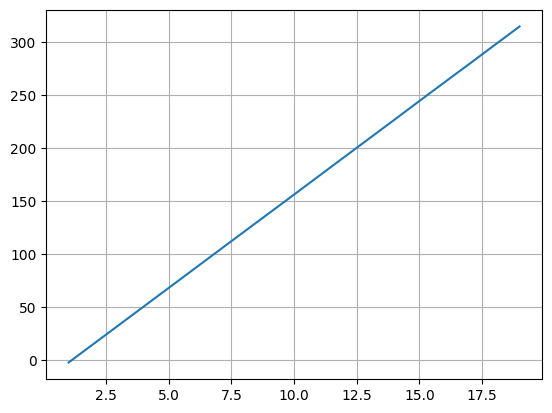

In [13]:
res = []
graph_row = {
    'qid': 16,
    'pseudoInputBytesRate': 1.409024e+05,
    'pseudoInputRecordsRate': 1333.500000,
    'vPs': '[4, 4]',
    'isBP': 0
}
arange = np.arange(1,20)
for i in arange:
    graph_row['pseudoInputBytesRate'] = i * 5.625173e+05
    graph_row['pseudoInputRecordsRate'] = i * 5462.166667
#     graph_row['vPs'] = '[{}, {},]'.format(8, 8)
#     print(graph_row)
    serialized = gtensor2serial(amaker.make(graph_row))
    serialized_ts = tf.constant([serialized,], dtype=tf.string)
    res.append(float(e_whole_model.signatures['serving_default'](serialized_ts)['logits']))
# plt.plot()

plt.plot(arange, res)

plt.grid()
plt.show()

In [14]:
6.5*5.625173e+05

3656362.45

In [15]:
tf.constant([serialized], dtype=tf.string)

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\n\xc1\x04\n\x19\n\x13edges/op2op.#target\x12\x02\x1a\x00\n+\n\x1fnodes/operate.bytes_selectivity\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n\x1d\n\x14edges/src2op.#source\x12\x05\x1a\x03\n\x01\x00\n\x1d\n\x14edges/src2op.#target\x12\x05\x1a\x03\n\x01\x00\n\x1a\n\x11edges/op2op.#size\x12\x05\x1a\x03\n\x01\x00\n-\n!nodes/operate.records_selectivity\x12\x08\x12\x06\n\x04\x00\x00\x00\x00\n\x1b\n\x12context/label_isBP\x12\x05\x1a\x03\n\x01\x00\nC\n#nodes/operate.utilization_embedding\x12\x1c\x12\x1a\n\x18\xff\xe8\x03\xc1^\x1a\xf8\xc0\xd4\x0c\x88@\xef\xc0U\xc1"\xdb\xb1\xc1\x82\xac\x95\xc1\n&\n\x1acontext/records_input_rate\x12\x08\x12\x06\n\x04\x95\xb2\xcaG\n\x1b\n\x12nodes/source.#size\x12\x05\x1a\x03\n\x01\x01\n\x1c\n\x13nodes/operate.#size\x12\x05\x1a\x03\n\x01\x01\n$\n\x18context/bytes_input_rate\x12\x08\x12\x06\n\x04U\x15#K\n\x19\n\x13edges/op2op.#source\x12\x02\x1a\x00\n$\n\x18nodes/source.parallelism\x12\x08\x12\x06\n\x04\x00\x00\x80@

In [82]:
def make_vPs(vnum, propose_parallel, source_parallel):
        if source_parallel:
            return '[' + str(source_parallel)+',' + ' '.join([str(propose_parallel)+',' for i in range(vnum-1)]) + ']'
        return '[' + ' '.join([str(propose_parallel)+',' for i in range(vnum)]) + ']'

def rcmmdr(qid, bRate, rRate,  vnum, source_parallel=None, thres=105):
    graph_row = {
        'qid': qid,
        'pseudoInputBytesRate': bRate,
        'pseudoInputRecordsRate': rRate,
        'vPs': make_vPs(vnum, 2, source_parallel),
        'isBP': 0
    }
    
    fuck = []
    ress = []
    
#     for i in range(50):
    for propose_parallel in [2,3,4,6,8,12,16,32,64]:
        print(graph_row)
        serialized = gtensor2serial(amaker.make(graph_row))
        serialized_ts = tf.constant([serialized,], dtype=tf.string)
        res = e_whole_model.signatures['serving_default'](serialized_ts)['logits']
        ress.append(float(res))
        if res < thres:
#             return graph_row
            return ress
            fuck.append(0)
        else:
            fuck.append(1)
#         propose_parallel += 1
        graph_row['vPs'] = make_vPs(vnum, propose_parallel, source_parallel)
    return ress

In [83]:
# tmp = 1e+06 # q16
# tmp2 = 1e+04
# tmp = 1e+06
# tmp2 = 24571.0
tmp = 1.191663e+06

for i in range(20):
#     print(i, rcmmdr(4, tmp*i, tmp2*i, 4, source_parallel=None, thres=150))
#     print(i, rcmmdr(4, tmp*i, tmp2*i, 4, source_parallel=None, thres=110))
    print(i, rcmmdr(4, tmp*i, tmp2*i, 4, source_parallel=None, thres=10))
    print()

{'qid': 4, 'pseudoInputBytesRate': 0.0, 'pseudoInputRecordsRate': 0.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
0 [-1.01528799533844]

{'qid': 4, 'pseudoInputBytesRate': 1000000.0, 'pseudoInputRecordsRate': 24571.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
1 [-1.745510458946228]

{'qid': 4, 'pseudoInputBytesRate': 2000000.0, 'pseudoInputRecordsRate': 49142.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
2 [8.283660888671875]

{'qid': 4, 'pseudoInputBytesRate': 3000000.0, 'pseudoInputRecordsRate': 73713.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 3000000.0, 'pseudoInputRecordsRate': 73713.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 3000000.0, 'pseudoInputRecordsRate': 73713.0, 'vPs': '[3, 3, 3, 3,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 3000000.0, 'pseudoInputRecordsRate': 73713.0, 'vPs': '[4, 4, 4, 4,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 3000000.0, 'pseudoInputRecordsRate': 73713.0, 'vPs': '[6, 6, 6, 6,]', 'isBP': 0}
{'qid': 4, '

{'qid': 4, 'pseudoInputBytesRate': 11000000.0, 'pseudoInputRecordsRate': 270281.0, 'vPs': '[16, 16, 16, 16,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 11000000.0, 'pseudoInputRecordsRate': 270281.0, 'vPs': '[32, 32, 32, 32,]', 'isBP': 0}
11 [98.55167388916016, 98.55167388916016, 97.87466430664062, 97.14838409423828, 95.77698516845703, 93.67100524902344, 89.47593688964844, 83.7117691040039, 50.78682327270508]

{'qid': 4, 'pseudoInputBytesRate': 12000000.0, 'pseudoInputRecordsRate': 294852.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 12000000.0, 'pseudoInputRecordsRate': 294852.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 12000000.0, 'pseudoInputRecordsRate': 294852.0, 'vPs': '[3, 3, 3, 3,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 12000000.0, 'pseudoInputRecordsRate': 294852.0, 'vPs': '[4, 4, 4, 4,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 12000000.0, 'pseudoInputRecordsRate': 294852.0, 'vPs': '[6, 6, 6, 6,]', 'i

{'qid': 4, 'pseudoInputBytesRate': 18000000.0, 'pseudoInputRecordsRate': 442278.0, 'vPs': '[6, 6, 6, 6,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 18000000.0, 'pseudoInputRecordsRate': 442278.0, 'vPs': '[8, 8, 8, 8,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 18000000.0, 'pseudoInputRecordsRate': 442278.0, 'vPs': '[12, 12, 12, 12,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 18000000.0, 'pseudoInputRecordsRate': 442278.0, 'vPs': '[16, 16, 16, 16,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 18000000.0, 'pseudoInputRecordsRate': 442278.0, 'vPs': '[32, 32, 32, 32,]', 'isBP': 0}
18 [168.76434326171875, 168.76434326171875, 168.07713317871094, 167.38992309570312, 165.98423767089844, 163.92576599121094, 159.67840576171875, 153.88059997558594, 120.94783782958984]

{'qid': 4, 'pseudoInputBytesRate': 19000000.0, 'pseudoInputRecordsRate': 466849.0, 'vPs': '[2, 2, 2, 2,]', 'isBP': 0}
{'qid': 4, 'pseudoInputBytesRate': 19000000.0, 'pseudoInputRecordsRate': 466849.0, 'vPs': '[2, 

In [40]:
'[' + ' '.join([str(2)+',' for i in range(4)]) + ']'

'[2, 2, 2, 2,]'

In [20]:
1 / 0.67 *16386.500001

24457.4626880597

In [21]:
5551*7

38857

In [23]:
38857 / 4

9714.25

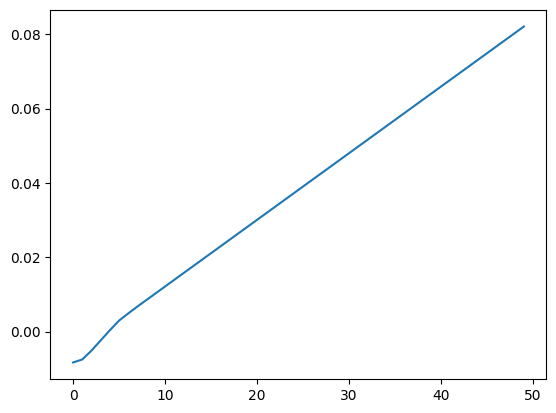

In [53]:
plt.plot([-0.008296070620417595, -0.007494339719414711, -0.005113933235406876, -0.0023740504402667284, 0.0003658317727968097, 0.002969140652567148, 0.004907292779535055, 0.006759283132851124, 0.00855313427746296, 0.010346985422074795, 0.012140837498009205, 0.013934685848653316, 0.015728535130620003, 0.017522389069199562, 0.019316241145133972, 0.021110093221068382, 0.022903943434357643, 0.024697793647646904, 0.026491645723581314, 0.028285495936870575, 0.030079346150159836, 0.031873200088739395, 0.03366704657673836, 0.03546089679002762, 0.03725475072860718, 0.03904860094189644, 0.040842454880476, 0.04263630136847496, 0.04443015530705452, 0.04622400179505348, 0.04801785945892334, 0.0498117096722126, 0.05160555616021156, 0.05339941009879112, 0.05519326031208038, 0.05698711425065994, 0.058780964463949203, 0.06057481840252876, 0.062368664890527725, 0.06416251510381699, 0.06595636904239655, 0.06775021553039551, 0.06954406946897507, 0.07133792340755463, 0.07313176989555359, 0.07492562383413315, 0.07671947777271271, 0.07851332426071167, 0.08030717819929123, 0.08210103213787079])

In [40]:
print('%E'%2)

SyntaxError: invalid syntax (1407271293.py, line 1)